In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.table import Table

In [2]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [
    np.array([0, -1]),
    np.array([-1, 0]),
    np.array([0, 1]),
    np.array([1, 0])]

ACTION_PROB = 0.25

ACTIONS_FIGS = [ '←', '↑', '→', '↓']

In [3]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5
    
    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        elif [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        elif [i, j] == B_POS:
            val = str(val) + " (B)"
        elif [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val, loc='center', facecolor='white')
    
    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right', edgecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center', edgecolor='none')

    ax.add_table(tb)
    plt.show()

def draw_policy(optimal_values):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = optimal_values.shape
    width, height = 1.0 / ncols, 1.0 / nrows
    
    # Add cells
    for (i, j), val in np.ndenumerate(optimal_values):
        next_vals = []
        for action in ACTIONS:
            next_state, _ = step([i, j], action)
            next_vals.append(optimal_values[next_state[0], next_state[1]])
        best_actions = np.where(next_vals == np.max(next_vals))[0]
        
        val = ''
        for ba in best_actions:
            val += ACTIONS_FIGS[ba]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        elif [i, j] == A_PRIME_POS:
            val = str(val) + " (A)'"
        elif [i, j] == B_POS:
            val = str(val) + " (B)"
        elif [i, j] == B_PRIME_POS:
            val = str(val) + " (B)'"
        
        tb.add_cell(i, j, width, height, text=val, loc='center', facecolor='white')
    
    # Row and column labels...
    for i in range(len(optimal_values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right', edgecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center', edgecolor='none')

    ax.add_table(tb)
    plt.show()

In [4]:
def figure_3_5():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                new_value[i, j] = np.max(values)
        
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=1))
            draw_policy(new_value)
            break
        value = new_value

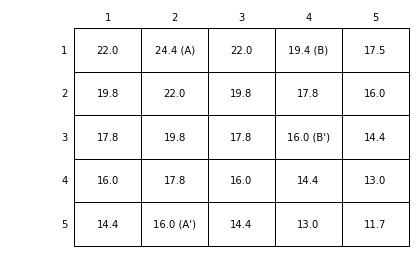

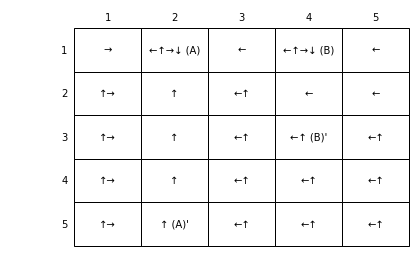

In [5]:
figure_3_5()